<a href="https://colab.research.google.com/github/VanishingRasengan/WahlfachKIWiSe2324/blob/main/Lektion_3_L%C3%B6sungen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification and Regression Trees
Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.

## Train your first classification tree
In this exercise you'll work with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os, scipy, sklearn
import sklearn.metrics, sklearn.preprocessing, sklearn.model_selection, sklearn.tree, sklearn.linear_model, sklearn.cluster
!pip install mlxtend --upgrade --no-deps

# importing the pathlib module - a handy library for working with the local file system in an object oriented way
from pathlib import Path
import pandas as pd

# creating a path object of our data directory within the mounted Google Drive
wbc_path = Path('/content/')

### to download the .csv file
!pip install wget
import wget
wget.download('https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv')

# create another pathlib object with the path to the csv file
wbc_csv_path = wbc_path / 'wbc.csv'
wbc_df = pd.read_csv(wbc_csv_path)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=fb973ebda3484a33ce41bfa5dcfbfa10d6528ad9603576f59f8270cfde818bc4
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
wbc_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
X = wbc_df[['radius_mean', 'concave points_mean']]
y = wbc_df['diagnosis']
y = y.map({'M':1, 'B':0})

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

The dataset is now loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

- Import DecisionTreeClassifier from sklearn.tree.
- Instantiate a DecisionTreeClassifier dt of maximum depth equal to 6.
- Fit dt to the training set.
- Predict the test set labels and assign the result to y_pred.

In [5]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 0]


## Evaluate the classification tree
Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model dt from the previous exercise is loaded in your workspace along with the test set features matrix X_test and the array of labels y_test.

- Import the function accuracy_score from sklearn.metrics.
- Predict the test set labels and assign the obtained array to y_pred.
- Evaluate the test set accuracy score of dt by calling accuracy_score() and assign the value to acc.

In [6]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


# Neural Networks

Finally, we want to have a look at Neural Networks!

 ## Setting up a network model and starting a first training

In this and the following exercise, we are going to practise, how to set up a neural network model and perform a first training with this network.
We will use the DermaMNIST from the MedMNIST datasets, which you have seen last lecture.

In [7]:
# Imports
import os
import sys
# from tqdm import trange
# from tqdm import tqdm
# from skimage.util import montage
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision as torchvision

!pip install medmnist
import medmnist
from medmnist.dataset import PathMNIST, ChestMNIST, DermaMNIST, OCTMNIST, PneumoniaMNIST, RetinaMNIST, BreastMNIST, OrganMNISTAxial, OrganMNISTCoronal, OrganMNISTSagittal
from medmnist.evaluator import getAUC, getACC
from medmnist.info import INFO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=c9ccf4d41e586b6f3a8ff182e1d5731fbec22fb83ad6ab6db90ed93b02c1be1d
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [8]:
print("Version:", medmnist.__version__)

Version: 2.2.3


In [9]:
# various MedMNIST datasets
data_flag = 'dermamnist'
download = True
input_root = 'tmp_data/'
!mkdir 'tmp_data'

flag_to_class = {
    "pathmnist": PathMNIST,
    "chestmnist": ChestMNIST,
    "dermamnist": DermaMNIST,
    "octmnist": OCTMNIST,
    "pneumoniamnist": PneumoniaMNIST,
    "retinamnist": RetinaMNIST,
    "breastmnist": BreastMNIST,
    "organmnist_axial": OrganMNISTAxial,
    "organmnist_coronal": OrganMNISTCoronal,
    "organmnist_sagittal": OrganMNISTSagittal,
}

DataClass = flag_to_class[data_flag]

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])
label_dict = info['label']

print(f"Info:\n{info}\n")
print(f"Task:\n{task}\n")
print(f"Channels:\n{n_channels}\n")
print(f"Number of classes:\n{n_classes}\n")
print(f"Label:\n{label_dict}\n")

Info:
{'python_class': 'DermaMNIST', 'description': 'The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.', 'url': 'https://zenodo.org/record/6496656/files/dermamnist.npz?download=1', 'MD5': '0744692d530f8e62ec473284d019b0c7', 'task': 'multi-class', 'label': {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}, 'n_channels': 3, 'n_samples': {'train': 7007, 'val': 1003, 'test': 2005}, 'license': 'CC BY-NC 4.0'}

Task:
multi-class

Channels:
3

Number of classes:
7

Label:
{'0': 'a

## Defining the augmentations

We now define the augmentations, in particular Resizing, Random Rotation and Normalizing.

In [10]:
# Imagenet values
norm_mean = (0.4914)
norm_std = (0.2023)

# define the transformaitons the images go through each time it is used for training
# includes augmentation AND normalization as described above
augmentation_train = transforms.Compose([
                                  # resize image to the network input size
                                  transforms.Resize((28,28)),
                                  # rotate the image with a certain angle range, randomly chosen
                                  transforms.RandomRotation(degrees=20),
                                  # convert the image into a tensor so it can be processed by the GPU
                                  transforms.ToTensor(),
                                  # normalize the image with the mean and std of ImageNet
                                  transforms.Normalize(norm_mean, norm_std),
                                   ])

# no augmentation for the test data only resizing, conversion to tensor and normalization
augmentation_test = transforms.Compose([
                    transforms.Resize((28,28)),
                    transforms.ToTensor(),
                    transforms.Normalize(norm_mean, norm_std),
                    ])

## Splitting up data

Set up datasets for training, validation and testing

In [11]:
# load the data
train_dataset = DataClass(root=input_root, split='train', transform=augmentation_train, download=download)
test_dataset = DataClass(root=input_root, split='test', transform=augmentation_test, download=download)
val_dataset = DataClass(root=input_root, split='val', transform=augmentation_test, download=download)

100%|██████████| 19725078/19725078 [00:02<00:00, 8291498.85it/s] 


Using downloaded and verified file: tmp_data/dermamnist.npz
Using downloaded and verified file: tmp_data/dermamnist.npz


In [12]:
# Some detailed information about all splits
print("===================")
print(train_dataset)
print("===================")
print(val_dataset)
print("===================")
print(test_dataset)

Dataset DermaMNIST (dermamnist)
    Number of datapoints: 7007
    Root location: tmp_data/
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0
Dataset DermaMNIST (dermamnist)
    Number of datapoints: 1003
    Root location: tmp_dat

## Create Dataloaders

PyTorch provides template Dataloader classes for easy data handling, assigning according transforms and splits. You can find more information about how PyTorch handles datasets and data loading [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

In [13]:
BATCH_SIZE = 128
### encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = data.DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [14]:
### the next() function returns the next item from the iterator.
batch_images, batch_labels = next(iter(train_loader))

torch.Size([3, 28, 28])


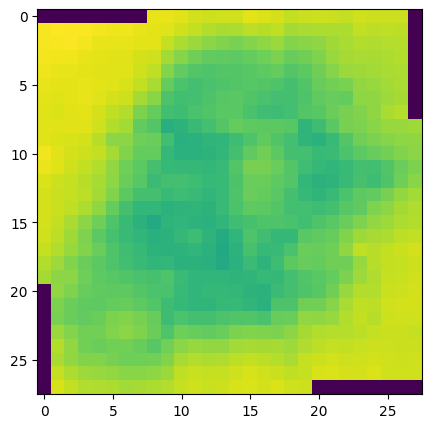

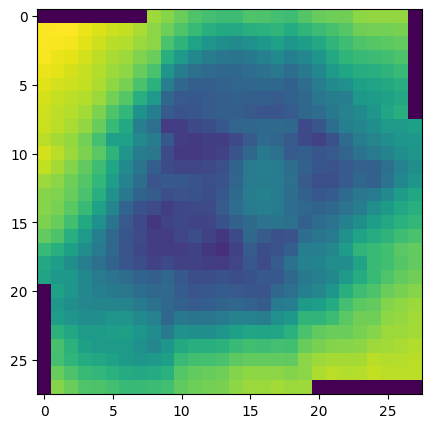

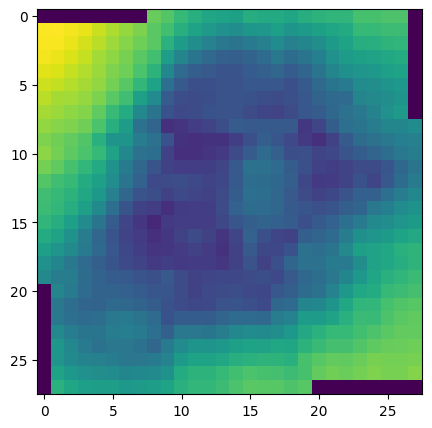

In [15]:
# show all 3 channels of image 10
print(batch_images[0].shape)

fig = plt.figure(figsize=(5, 5))
plt.imshow(batch_images[11][0,:,:])
fig = plt.figure(figsize=(5, 5))
plt.imshow(batch_images[11][1,:,:])
fig = plt.figure(figsize=(5, 5))
plt.imshow(batch_images[11][2,:,:])

### different color maps
### cmap='bone', cmap = 'summer', cmap = 'seismic'

## Define a Convolutional Neural Network

Pytorch makes it very easy to define a neural network. We have layers like Convolutions, ReLU non-linearity, Maxpooling etc. directly from [torch library](https://pytorch.org/docs/stable/nn.html).

In this tutorial, we use The LeNet architecture introduced by LeCun et al. in their 1998 paper, [Gradient-Based Learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf). As the name of the paper suggests, the authors’ implementation of LeNet was used primarily for OCR and character recognition in documents. The LeNet architecture is straightforward and small, (in terms of memory footprint), making it perfect for teaching the basics of CNNs.

To define a neural network in PyTorch one has to create a class inhereting from [torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). Crucially, this class has to include the function forward() which defines which computation should be performed at every call given a batch of inputs.

In [16]:
from torch import nn
import torch.nn.functional as F
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes = 7
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), padding=2)
        self.nonlin1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2))

        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5))
        self.nonlin2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2,2))

        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.nonlin3 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.nonlin4 = nn.ReLU()
        self.fc3 = nn.Linear(in_features=84, out_features=num_classes)
        self.nonlin5 = nn.ReLU()

    def forward(self, x):

        x = self.conv1(x)
        x = self.nonlin1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.nonlin2(x)
        x = self.pool2(x)

        x = x.view(-1, self.num_flat_features(x))

        x = self.fc1(x)
        x = self.nonlin3(x)
        x = self.fc2(x)
        x = self.nonlin4(x)
        x = self.fc3(x)
        x = self.nonlin5(x)

        return x

    def num_flat_features(self, x):

        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


You can use torchsummary to print out the architecture of your model given a certain input.

In [17]:
from torchsummary import summary

model = LeNet()
model.to(device)

summary(model, input_size=(1,28,28), batch_size=127)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [127, 6, 28, 28]             156
              ReLU-2           [127, 6, 28, 28]               0
         MaxPool2d-3           [127, 6, 14, 14]               0
            Conv2d-4          [127, 16, 10, 10]           2,416
              ReLU-5          [127, 16, 10, 10]               0
         MaxPool2d-6            [127, 16, 5, 5]               0
            Linear-7                 [127, 120]          48,120
              ReLU-8                 [127, 120]               0
            Linear-9                  [127, 84]          10,164
             ReLU-10                  [127, 84]               0
           Linear-11                   [127, 7]             595
             ReLU-12                   [127, 7]               0
Total params: 61,451
Trainable params: 61,451
Non-trainable params: 0
---------------------------------

## Exercise

Create a neural network capable of processing the image tensor 'img', which has only one channel. The network should contain at least one convolutional layer and one additional fully connected layer. Pay attention that within the fully connected layer the output dimension of the last convolutional layer has to fit the input dimension. Additionally, the output dimension of the fully connected layer before 'fc_fin' has to match the required input dimension of 'fc_fin'.

Some hints:

- Have a look at how LeNet is implemented above. Many concepts can be copied.
- Focus on using the PyTorch's Linear, Conv2d, MaxPool2d and ReLU layers and the .view() function. You can find detailed information on these components in [PyTorch's documentation](https://pytorch.org/docs/stable/index.html).
- Batch size does not have to be considered when designing the neural networks. PyTorch adapts the calculations automatically when provided with different batch sizes.

In [18]:
img = torch.rand((1, 1, 200, 200))

output_dim = 6

class LeNet2(nn.Module):
    def __init__(self):
        super(LeNet2, self).__init__()

        # --------------------

        ########## Insert your layers here ##########
        self.conv1 = nn.Conv2d(1, 6, (5,5), padding=2)
        self.nonlin1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, (5,5))
        self.fc1   = nn.Linear(16*48*48, 120)
        self.fc2   = nn.Linear(120, 48)
        # --------------------

        self.fc_fin = nn.Linear(in_features=48, out_features=output_dim)

    def forward(self, x):

        # --------------------

        ########## Insert your forward pass here ##########
        x = self.conv1(x)
        x = self.nonlin1(x)
        x = self.pool1(x)
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # --------------------

        x = self.fc_fin(x)

        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = LeNet2()

output = model(img)

if output.size(1) == 6:
    print('The correct output size has been generated.')
else:
    print('The generated output size is not correct')

The correct output size has been generated.


In [20]:
from torchsummary import summary

model = LeNet2()
model.to(device)

summary(model, input_size=(1,200,200), batch_size=127)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [127, 6, 200, 200]             156
              ReLU-2         [127, 6, 200, 200]               0
         MaxPool2d-3         [127, 6, 100, 100]               0
            Conv2d-4          [127, 16, 96, 96]           2,416
            Linear-5                 [127, 120]       4,423,800
            Linear-6                  [127, 48]           5,808
            Linear-7                   [127, 6]             294
Total params: 4,432,474
Trainable params: 4,432,474
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 19.38
Forward/backward pass size (MB): 666.27
Params size (MB): 16.91
Estimated Total Size (MB): 702.55
----------------------------------------------------------------


## Define a Loss function

Let's use a Classification Cross-Entropy loss.

$H_{y'} (y) := - \sum_{i} y_{i}' \log (y_i)$

### Median Frequency Balancing
There are datasets which have a large imbalance in the amount of label occurrence. A prediction would be therefore biased towards stronger represented classes. As a solution, we use **Median Frequency Balancing**. Essentially this tasks the optimizer to weight examples of rare cases more highly than examples of common cases that are processed more frequently.

In [21]:
# get the class labels of each image
class_labels = train_dataset.labels
# get the number of different classes
num_classes = np.max(class_labels)+1
# empty array for counting instance of each class
count_labels = np.zeros(num_classes)
# empty array for weights of each class
class_weights = np.zeros(num_classes)

# populate the count array
for l in class_labels:
    count_labels[l] += 1

# get median count
median_freq = np.median(count_labels)

# calculate the weigths
for i in range(num_classes):
    class_weights[i] = median_freq/count_labels[i]

# print the weights
for i in range(num_classes):
    print("class", i, ":", class_weights[i])

class 0 : 1.5745614035087718
class 1 : 1.0
class 2 : 0.4668400520156047
class 3 : 4.4875
class 4 : 0.46084724005134786
class 5 : 0.07649691029192414
class 6 : 3.6262626262626263


Now we define the loss function with the weights

In [22]:
class_weights = torch.FloatTensor(class_weights).to(device)
criterion = nn.CrossEntropyLoss(weight = class_weights)

## Define the Optimizer

The most common and effective optimizer currently used is **Adam: Adaptive Moments**. You can check out [the paper on it](https://arxiv.org/abs/1412.6980) for more information.


In [23]:
import torch.optim as optim

# now lets go back to the initial LeNet architecture
net = LeNet()
net = net.to(device)

# and define an optimizer
optimizer = optim.Adam(net.parameters(), lr=1e-5)
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (nonlin1): ReLU()
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (nonlin2): ReLU()
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (nonlin3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (nonlin4): ReLU()
  (fc3): Linear(in_features=84, out_features=7, bias=True)
  (nonlin5): ReLU()
)


## Network training

After everything has been set up, we can now start an actual training on our dataset. To save time, for the moment we will run only ten epochs. Within the training, our dataloader is used to load a batch from our dataset. This batch is forwarded to the model. The corresponding output is compared against its labels with the chosen loss function, here called 'criterion'. Then, the loss values are backpropagated through the whole model.

After, the training step a validation step is performed. Here the network is set to .eval() mode in which its weights are not being updated and consequently backprogagation is not needed.

In [24]:
num_epochs = 10

for epoch in range(num_epochs):

    ##### Training loop #####
    running_loss_train = 0.0
    num_correct_train = 0
    num_all_train = 0

    for i, data in enumerate(train_loader):

        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), torch.squeeze(labels).to(device)

        # set model to training mode
        net.train()

        # set the parameter gradients to zero
        optimizer.zero_grad()

        # calculate the network output and its loss
        outputs = net(inputs[:,0:1,:,:])
        loss = criterion(outputs, labels)

        # During training we need to backpropagate the loss and conduct an optimization step
        loss.backward()
        optimizer.step()

        # compute running loss and accuracy
        running_loss_train += loss.item()

        _, predicted = torch.max(outputs, 1)
        num_correct_train += torch.sum(predicted == labels).item()
        num_all_train += labels.size()[0]

        training_loss = running_loss_train / num_all_train
        training_accuracy = num_correct_train / num_all_train


    ##### Validation loop #####
    running_loss_val = 0.0
    num_correct_val = 0
    num_all_val = 0

    for i, data in enumerate(val_loader):

        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), torch.squeeze(labels).to(device)

        # set model to evaluation mode
        net.eval()

        # calculate the network output and its loss
        outputs = net(inputs[:,0:1,:,:])
        loss = criterion(outputs, labels)

        # compute running loss and accuracy
        running_loss_val += loss

        _, predicted = torch.max(outputs, 1)
        num_correct_val += torch.sum(predicted == labels).item()
        num_all_val += labels.size()[0]

        validation_loss = running_loss_val / num_all_val
        validation_accuracy = num_correct_val / num_all_val

    print('Epoch: {}, training loss: {:.4f}, training accuracy: {}%, validation loss: {:.4f}, validation accuracy: {}%, '.format(epoch+1, training_loss, np.round(training_accuracy, 3) * 100, validation_loss, np.round(validation_accuracy, 3) * 100))


Epoch: 1, training loss: 0.0153, training accuracy: 2.0%, validation loss: 0.0155, validation accuracy: 1.5%, 
Epoch: 2, training loss: 0.0153, training accuracy: 1.7999999999999998%, validation loss: 0.0155, validation accuracy: 1.4000000000000001%, 
Epoch: 3, training loss: 0.0153, training accuracy: 1.7999999999999998%, validation loss: 0.0155, validation accuracy: 1.4000000000000001%, 
Epoch: 4, training loss: 0.0153, training accuracy: 2.1%, validation loss: 0.0155, validation accuracy: 1.4000000000000001%, 
Epoch: 5, training loss: 0.0153, training accuracy: 2.9000000000000004%, validation loss: 0.0155, validation accuracy: 1.5%, 
Epoch: 6, training loss: 0.0153, training accuracy: 3.6999999999999997%, validation loss: 0.0155, validation accuracy: 1.5%, 
Epoch: 7, training loss: 0.0153, training accuracy: 5.1%, validation loss: 0.0155, validation accuracy: 1.7999999999999998%, 
Epoch: 8, training loss: 0.0153, training accuracy: 5.800000000000001%, validation loss: 0.0155, valida

## Exercise
After performing the training and validation of your system you are now ready to perform the inference on your test set. Implement the inference step for out dataset. Hint: It will look very similar to one the previous loops (train or validation).

In [25]:
running_loss_test = 0.0
num_correct_test = 0
num_all_test = 0

for i, data in enumerate(test_loader):

    ########## Implement the data loading and prediction on the test set ##########

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    print(type(labels))
    net.eval()  # Set model to validation mode

    # -------------------------------
    # Calculate the network output and its loss
    outputs = net(inputs[:,0:1,:,:])
    loss = criterion(outputs, torch.argmax(labels, 1))

    ########## ------------------------------- ##########

    _, predicted = torch.max(outputs, 1)
    num_correct_test += torch.sum(predicted == labels).item()
    num_all_test += labels.size()[0]
    running_loss_test += loss.item()

    test_loss = running_loss_test / num_all_test
    test_accuracy = num_correct_test / num_all_test

print('Loss for test set is {}'.format(test_loss))
print('Test accuracy of the network: {}%'.format(np.round(test_accuracy, 3)*100))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
Loss for test set is 0.015568957899574033
Test accuracy of the network: 397.0%
